<a href="https://colab.research.google.com/github/Meenutomar/Intel_Product_Sentiment_Analysis/blob/main/notebooks/Restaurant_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Rating Prediction

Objective: Build a machine learning model to predict the
 aggregate rating of a restaurant based on other features.

Steps:
 - Preprocess the dataset by handling missing values,
 encoding categorical variables, and splitting the data
 into training and testing sets.
- Select a regression algorithm (e.g., linear regression,
- decision tree regression) and train it on the training data.
 - Evaluate the model's performance using appropriate
 regression metrics (e.g., mean squared error, R-squared)
 on the testing data.
 - Interpret the model's results and analyze the most
 influential features affecting restaurant ratings

## Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Mount Data from Drive

In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Understanding Data

In [20]:
df = pd.read_csv('/content/drive/MyDrive/data/Cognifyz/Dataset .csv')

In [21]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [22]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [23]:
df.shape

(9551, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
df.City.value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Panchkula,1
Mc Millan,1
Mayfield,1


In [26]:
df.fillna(df.mean(numeric_only=True), inplace=True)  # Numeric columns
df.fillna('Unknown', inplace=True)  # Categorical columns

# For handling categorical variables

 Encode categorical *variables*
 ##Apply one-hot encoding to categorical columns
 # Step 2: Split data into features and target
  Split the dataset into training and testing sets

  

In [35]:


# Define categorical and numerical columns
categorical_columns = ['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking',
                       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
                       'Rating color', 'Rating text']
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
numerical_columns.remove('Aggregate rating')  # Exclude the target variable

# ColumnTransformer for preprocessing
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns),
        ('passthrough', 'passthrough', numerical_columns)
    ]
)

# Split data into features and target
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_encoded = ct.fit_transform(X_train)

# Transform the testing data
X_test_encoded = ct.transform(X_test)


#Now that the data is prepared, we need to:


Starting with a baseline model like Linear Regression for simplicity

# Step 3: Train a Linear Regression model



In [36]:

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_encoded, y_train)

# Make predictions and evaluate the model
y_pred = linear_reg.predict(X_test_encoded)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.03779925042879912
R-squared (R²): 0.9833930402323751


In [43]:
# Print the predicted values
print("Predicted Values:")
print(y_pred)

# Optionally, print the actual values for comparison
print("\nActual Values:")
print(y_test.values)


Predicted Values:
[2.33666411 4.09126509 3.03126544 ... 3.0456245  4.08317607 4.31356271]

Actual Values:
[2.1 4.1 3.2 ... 3.1 4.2 4.3]


In [37]:
# Retrieve feature names from ColumnTransformer
feature_names = (
    ct.named_transformers_['onehot'].get_feature_names_out(categorical_columns).tolist()
    + numerical_columns
)

# Combine feature names with model coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': linear_reg.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display top features
print(coefficients.head(10))  # Most positive impact
print(coefficients.tail(10))  # Most negative impact


                                          Feature  Coefficient
2764                      Rating color_Dark Green     0.768608
2771                        Rating text_Excellent     0.768608
2775                        Rating text_Very Good     0.552040
2765                           Rating color_Green     0.552040
1234             Cuisines_American, Burger, Grill     0.503193
330     Locality_Country Inn & Suites, Sohna Road     0.491415
1328  Cuisines_Asian, Mediterranean, North Indian     0.470317
1557               Cuisines_Cafe, Italian, Bakery     0.465489
1792       Cuisines_Continental, Italian, Mexican     0.457429
424                       Locality_Federal Street     0.445849
                                                Feature  Coefficient
2692  Cuisines_Street Food, Mithai, South Indian, No...    -0.508815
2320          Cuisines_North Indian, Biryani, Fast Food    -0.517252
1942  Cuisines_Fast Food, North Indian, Chinese, Des...    -0.536099
1971        Cuisines_Finger Foo

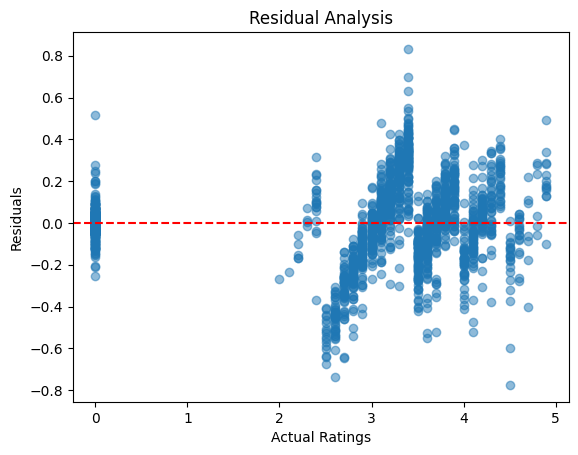

In [38]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Ratings")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


In [39]:


# Initialize and train the model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_encoded, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test_encoded)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R²): {r2_rf}")


Random Forest - Mean Squared Error (MSE): 0.02714267294610145
Random Forest - R-squared (R²): 0.988074967823746


In [40]:
# Calculate accuracy as a percentage from R²
accuracy = r2 * 100  # r2 is already calculated earlier
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 98.34%


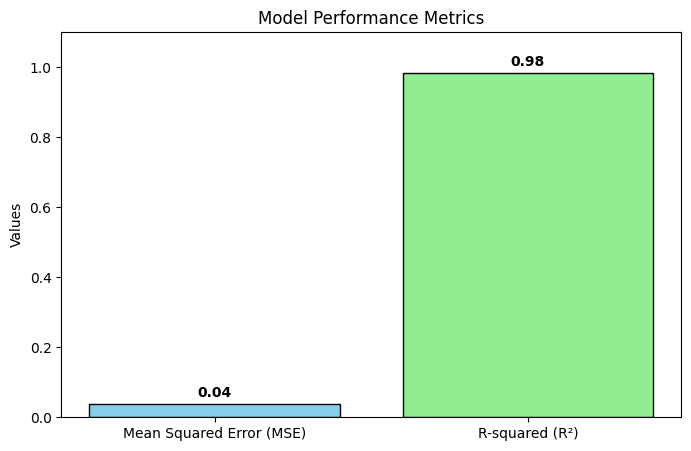

In [41]:


# Define metrics and values
metrics = ['Mean Squared Error (MSE)', 'R-squared (R²)']
values = [mse, r2]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Model Performance Metrics')
plt.ylabel('Values')
plt.ylim(0, 1.1)  # Set y-limit to highlight the scale

# Add text labels for the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=10, fontweight='bold')

# Display the chart
plt.show()


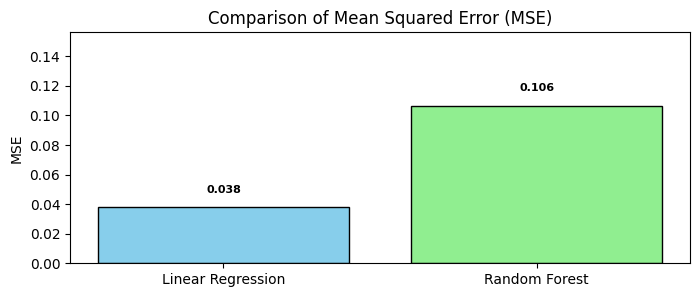

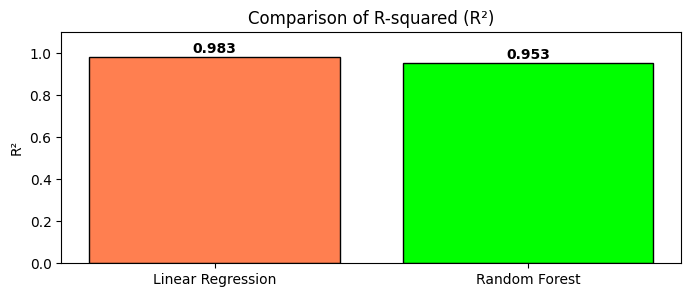

In [49]:
import matplotlib.pyplot as plt

# Collect metrics for both models
models = ['Linear Regression', 'Random Forest']
mse_values = [0.03779925042879912, 0.1062091766296997]  # MSE for Linear and Random Forest
r2_values = [0.9833930402323751, 0.9533373941749343]  # R² for Linear and Random Forest

# Create a bar chart to compare MSE
plt.figure(figsize=(8, 3))
plt.bar(models, mse_values, color=['skyblue', 'lightgreen'], edgecolor='black')
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) + 0.05)
for i, v in enumerate(mse_values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=8, fontweight='bold')
plt.show()

# Create a bar chart to compare R-squared (R²)
plt.figure(figsize=(8, 3))
plt.bar(models, r2_values, color=['coral', 'lime'], edgecolor='black')
plt.title('Comparison of R-squared (R²)')
plt.ylabel('R²')
plt.ylim(0, 1.1)  # Since R² is between 0 and 1
for i, v in enumerate(r2_values):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')
plt.show()
